In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import data
dengue = pd.read_csv("../Data/data_dengue.csv")
google = pd.read_csv("../Data/daily_google.csv", delimiter=";")
rt = pd.read_csv("../Data/rt_dengue2.csv")

In [3]:
#Process and group cases
dengue_nal = pd.DataFrame(dengue.groupby(["FEC_NOT"])["CONSECUTIVE"].count()).reset_index()
dengue_nal.columns = ["date", "cases"]
dengue_nal["date"] = pd.DatetimeIndex(dengue_nal["date"])
dengue_nal["week"] = dengue_nal["date"].dt.isocalendar().week
dengue_nal["year"] = dengue_nal["date"].dt.isocalendar().year
dengue_agg = pd.DataFrame(dengue_nal.groupby(["year", "week"])["cases"].sum()).reset_index()
dengue_agg["date"] = pd.to_datetime(dengue_agg["year"].astype(str)+dengue_agg["week"].astype(str)+"1", format='%Y%W%w')

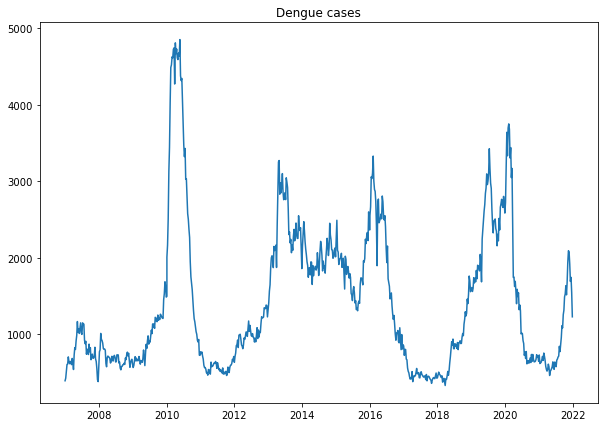

In [21]:
plt.figure(figsize=(10,7))
plt.plot(dengue_agg["date"], dengue_agg["cases"])
plt.title("Dengue cases")
plt.show()

In [5]:
# Process digital data
google["date"] = pd.to_datetime(google["date"], format="%d/%m/%Y")
google["week"] = google["date"].dt.isocalendar().week
google["year"] = google["date"].dt.isocalendar().year
google_agg = pd.DataFrame(google.groupby(["year", "week"]).mean()).reset_index()
google_agg["date"] = pd.to_datetime(google_agg["year"].astype(str)+google_agg["week"].astype(str)+"1", format='%Y%W%w')

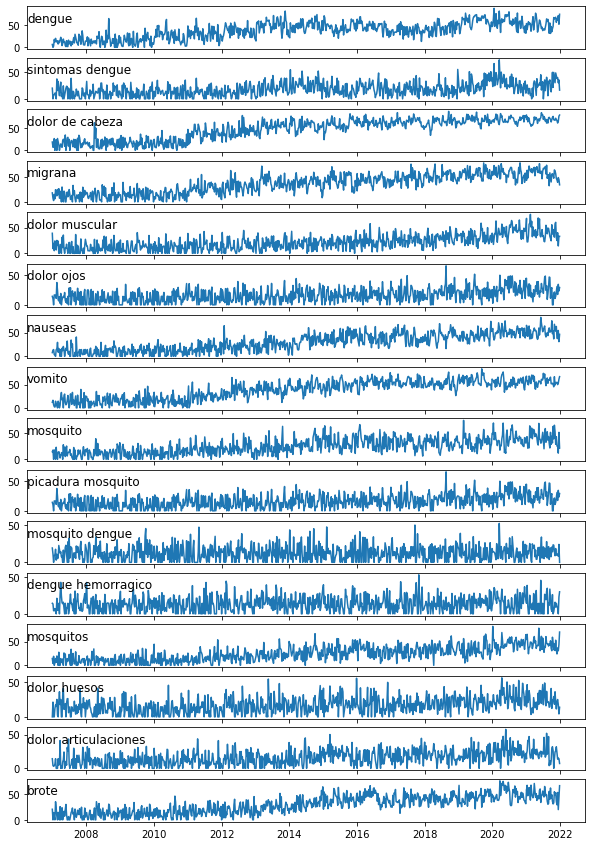

In [16]:
variables = google_agg.columns[2:18]
i = 0
fig, ax = plt.subplots(16,1, figsize=(10,15), sharex=True)
for col in variables:
    ax[i].plot(google_agg["date"], google_agg[col])
    ax[i].set_title(col, y = 0.5, loc='left')
    i += 1
plt.show()

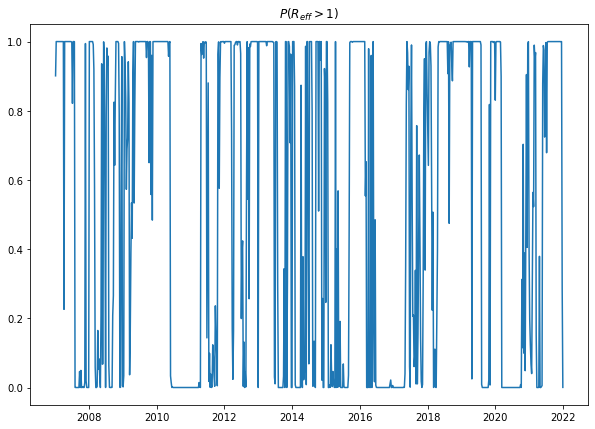

In [23]:
rt["date"] = pd.DatetimeIndex(rt["date"])
plt.figure(figsize=(10,7))
plt.plot(rt["date"], rt["Rt"])
plt.title(r"$P(R_{eff}>1)$")
plt.show()

In [26]:
# Define the final dataset
df = (google_agg.merge(dengue_agg)).merge(rt).set_index("date")
df.drop(df.columns[[0,1]], axis=1, inplace=True)
df.to_csv("../Data/final_data.csv")
df.head()

,dengue,sintomas dengue,dolor de cabeza,migrana,dolor muscular,dolor ojos,nauseas,vomito,mosquito,picadura mosquito,mosquito dengue,dengue hemorragico,mosquitos,dolor huesos,dolor articulaciones,brote,cases,Rt
date,,,,,,,,,,,,,,,,,,
2007-01-08,0.000000,0.000000,6.714286,7.571429,9.285714,10.428571,13.000000,16.285714,17.428571,10.428571,11.428571,13.428571,4.142857,21.0,4.142857,0.000000,427,0.901
2007-01-15,3.000000,7.142857,7.428571,2.571429,19.428571,0.000000,14.285714,6.571429,0.000000,0.000000,0.000000,4.142857,19.000000,0.0,3.000000,14.285714,518,1.000
2007-01-22,17.857143,7.571429,26.285714,14.857143,5.142857,16.714286,3.714286,2.571429,17.714286,16.714286,9.285714,7.142857,0.000000,0.0,3.857143,6.000000,607,1.000
2007-01-29,12.142857,10.857143,0.000000,6.142857,24.285714,16.428571,3.428571,1.571429,9.000000,16.428571,10.285714,4.000000,4.857143,12.0,6.285714,0.000000,611,1.000
2007-02-05,20.428571,10.428571,22.857143,24.428571,16.428571,16.000000,0.000000,14.285714,0.000000,16.000000,17.571429,6.571429,14.285714,17.0,14.285714,35.428571,706,1.000
